Import du dataset

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dataset = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = dataset.data.features 
y = dataset.data.targets 
  
# metadata 
print(dataset.metadata) 
  
# variable information 
print(dataset.variables) 


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'title': 'Dataset f

In [26]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [28]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NObeyesdad  2111 non-null   object
dtypes: object(1)
memory usage: 16.6+ KB


In [29]:
y.value_counts(normalize=True)*100

NObeyesdad         
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: proportion, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in X.columns:
    #print(column)
    X[column] = le.fit_transform(X[column])

In [31]:
X = X.rename(columns={'Gender': 'Gender',
                       'Age': 'Age',
                       'Height': 'Height',
                       'Weight': 'Weight',
                       'family_history_with_overweight': 'family_history_with_overweight',
                       'FAVC': 'high_caloric_food',
                       'FCVC': 'vegetables_meals',
                       'NCP': 'main_meals_daily',
                       'CAEC': 'eat_btw_meals',
                       'SMOKE': 'SMOKE',
                       'CH2O': 'CH2O',
                       'SCC': 'monitor_calories',
                       'FAF': 'physical_activity',
                       'TUE': 'tech_time',
                       'CALC': 'alcohol_frequency',
                       'MTRANS': 'MTRANS'})

In [32]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,high_caloric_food,vegetables_meals,main_meals_daily,eat_btw_meals,SMOKE,CH2O,monitor_calories,physical_activity,tech_time,alcohol_frequency,MTRANS
0,0,404,295,245,1,0,170,477,2,0,549,0,0,840,3,3
1,0,404,28,173,1,0,809,477,2,1,1267,1,1189,0,2,3
2,1,701,1306,382,1,0,170,477,2,0,549,0,1071,840,1,3
3,1,1021,1306,643,0,0,809,477,2,0,549,0,1071,0,1,4
4,1,578,1202,692,0,0,170,0,2,0,549,0,0,0,2,3


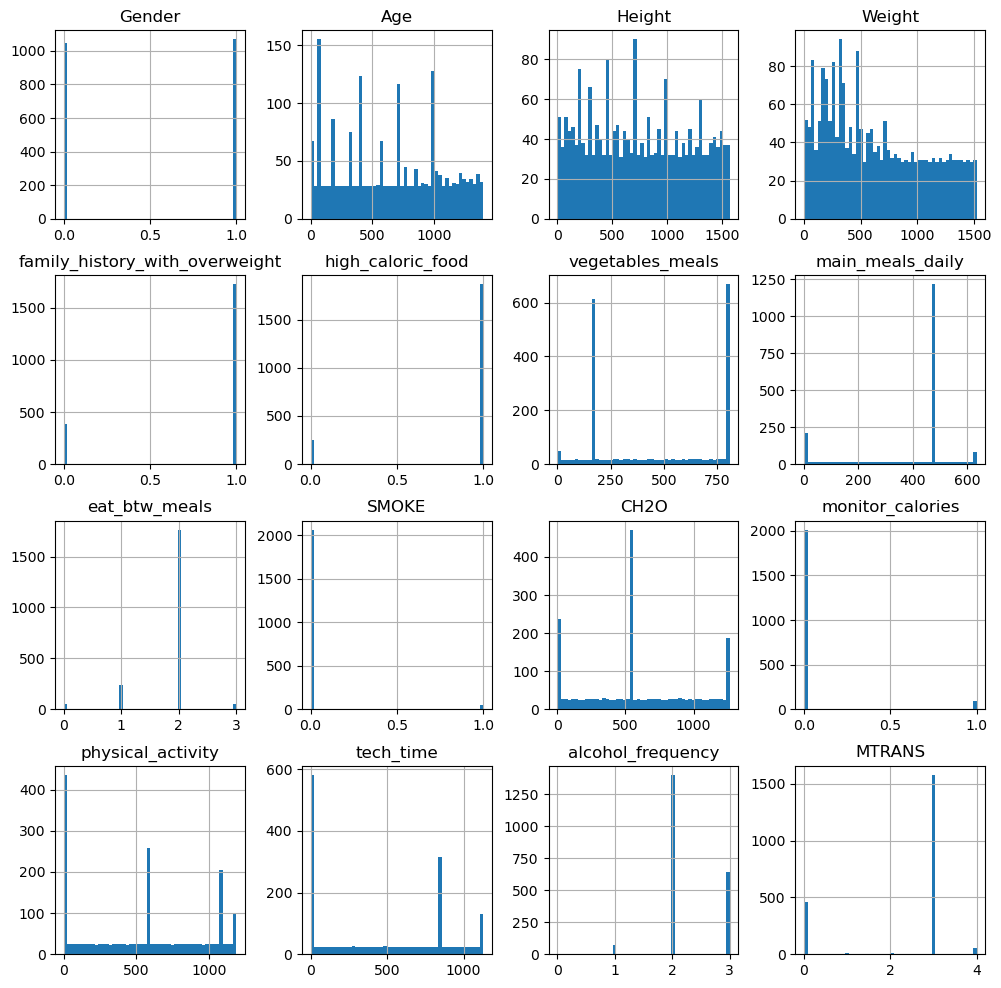

In [33]:
#Affichage des graphiques
X.hist(bins=50, figsize=(12, 12))
plt.show()


Création des ensembles de test et d'entrainement

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Sélection du modèle: Notre objectif étant de prédire le type d'obésité d'une personne, il s'agit alors d'un problème de classification. Nous allons choisir entre trois modèle de classification: Random forest, SVM et KNN

Random Forest